In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['retina']

In [2]:
import pandas

In [3]:
df = pandas.read_csv("./minetestmapper/dump.txt", names=['obj', 'blkx', 'blky', 'localx','localy', 'orient'])

In [4]:
directions=['N','E','S','W']

In [5]:
def calc_x(row):
    return row['blkx'] * 16 + row['localx']
def calc_y(row):
    return row['blky'] * 16 + row['localy']

In [6]:
df['x']=df.apply (lambda row: calc_x(row), axis=1)
df['y']=df.apply (lambda row: calc_y(row), axis=1)
df['var']=df.apply (lambda row: -1, axis=1)


In [7]:
df

,obj,blkx,blky,localx,localy,orient,x,y,var
0,mesecons_insulated:insulated_off,0,121,1,0,3,1,1936,-1
1,mesecons_insulated:insulated_off,0,121,1,1,3,1,1937,-1
2,mesecons_lamp:lamp_off,0,121,1,2,1,1,1938,-1
3,mesecons_insulated:insulated_on,0,120,0,0,3,0,1920,-1
4,mesecons_extrawires:tjunction_on,0,120,2,0,3,2,1920,-1
5,mesecons_extrawires:corner_on,0,120,3,0,1,3,1920,-1
6,mesecons_insulated:insulated_off,0,120,5,0,3,5,1920,-1
7,mesecons_insulated:insulated_off,0,120,7,0,3,7,1920,-1
8,mesecons_insulated:insulated_on,0,120,0,1,3,0,1921,-1
9,mesecons_insulated:insulated_on,0,120,2,1,3,2,1921,-1


In [8]:
nonwire = df[(~df['obj'].str.contains("insulated") & (~df['obj'].str.contains("extrawires") ))]
nonwire

,obj,blkx,blky,localx,localy,orient,x,y,var
2,mesecons_lamp:lamp_off,0,121,1,2,1,1,1938,-1
11,mesecons_gates:not_on,0,120,5,1,3,5,1921,-1
14,mesecons_gates:and_on,0,120,1,2,3,1,1922,-1
17,mesecons_gates:and_on,0,120,4,2,3,4,1922,-1
57,mesecons_gates:not_off,0,120,5,8,3,5,1928,-1
59,mesecons_gates:or_on,0,120,1,9,3,1,1929,-1
62,mesecons_gates:and_off,0,120,4,9,3,4,1929,-1
76,mesecons_gates:and_off,0,120,1,14,3,1,1934,-1
188,mesecons_gates:and_on,0,119,1,4,3,1,1908,-1
192,mesecons_gates:and_off,0,119,6,4,3,6,1908,-1


In [9]:
df['obj'].unique()

array(['mesecons_insulated:insulated_off', 'mesecons_lamp:lamp_off',
       'mesecons_insulated:insulated_on',
       'mesecons_extrawires:tjunction_on',
       'mesecons_extrawires:corner_on', 'mesecons_gates:not_on',
       'mesecons_gates:and_on', 'mesecons_extrawires:crossover_on',
       'mesecons_extrawires:crossover_01',
       'mesecons_extrawires:corner_off',
       'mesecons_extrawires:crossover_10', 'mesecons_gates:not_off',
       'mesecons_gates:or_on', 'mesecons_gates:and_off',
       'mesecons_extrawires:crossover_off', 'mesecons_gates:xor_off',
       'mesecons_gates:or_off', 'mesecons_extrawires:tjunction_off',
       'mesecons_gates:xor_on', 'mesecons_walllever:wall_lever_off'],
      dtype=object)

In [10]:
nonwire['obj'].unique()

array(['mesecons_lamp:lamp_off', 'mesecons_gates:not_on',
       'mesecons_gates:and_on', 'mesecons_gates:not_off',
       'mesecons_gates:or_on', 'mesecons_gates:and_off',
       'mesecons_gates:xor_off', 'mesecons_gates:or_off',
       'mesecons_gates:xor_on', 'mesecons_walllever:wall_lever_off'],
      dtype=object)

In [11]:
def local_display(d, x,y, tx, ty):
    local_objs = np.array(d[(d['x'] > x-tx) & (d['x'] < x+tx) & (d['y'] > y-ty) & (d['y'] < y+ty)][['x','y','orient']].values)
    return local_objs
    

In [51]:
vals = local_display(df,1,1,50,50).T

In [52]:
directions=['N','E','S','W']

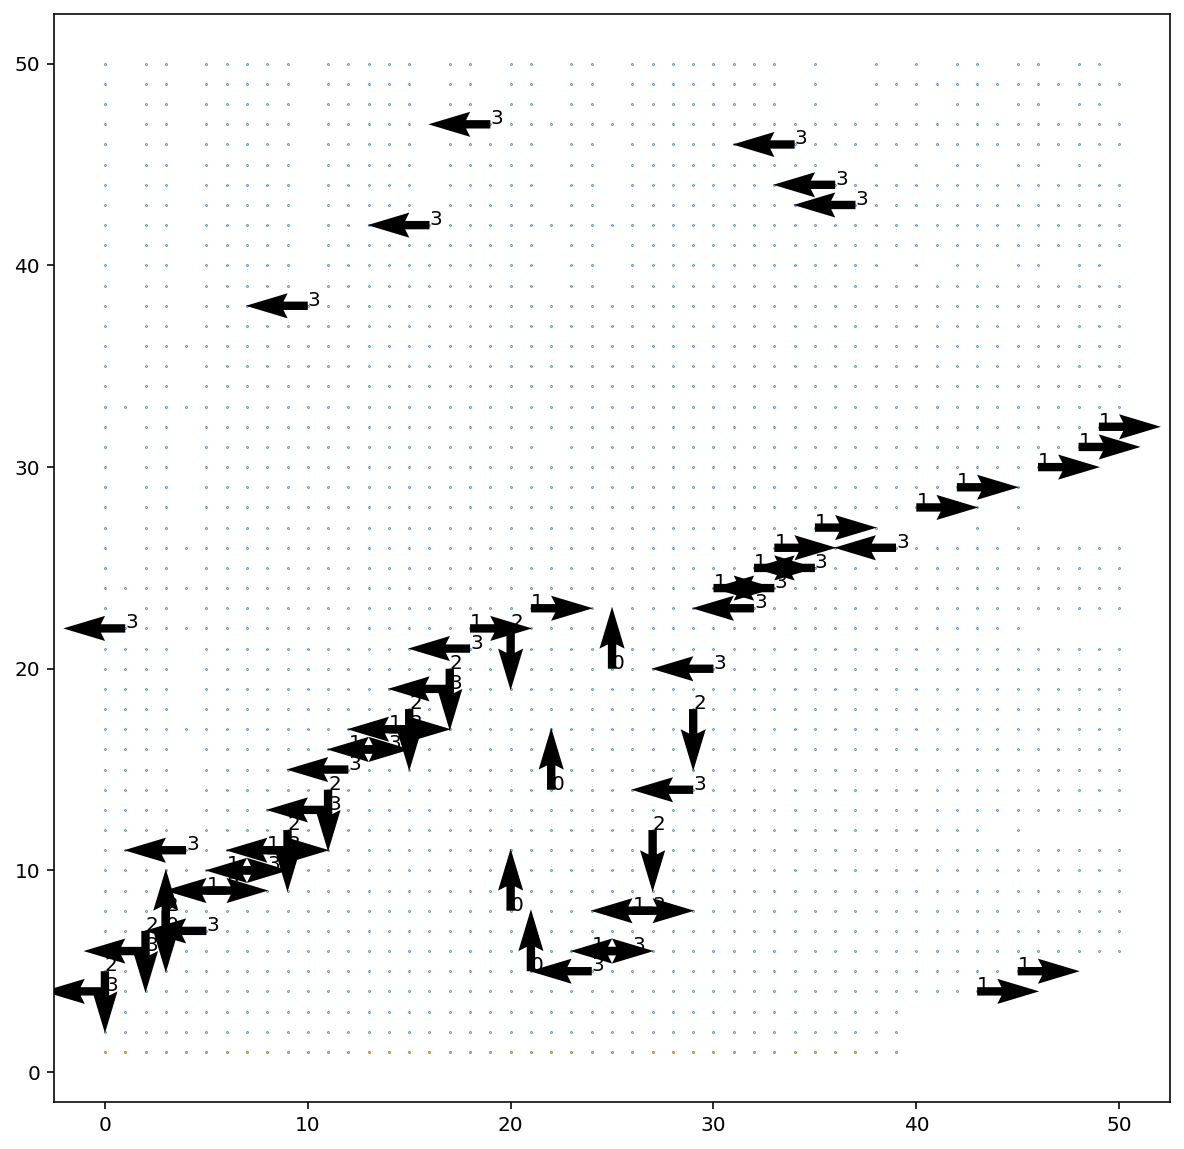

In [53]:
# 结论：corner 的 orient 指向是顺时针：A线路-B线路-+90度
# A           | B
#  ---- -----   ----> orient
plt.figure(figsize=(10,10))
plt.scatter(vals[0],vals[1],s=0.1)
lever = local_display(df[df['obj'].str.match('mesecons_walllever:wall_lever_off')],1,1,50,50).T
plt.scatter(lever[0], lever[1],s=0.1)
tcorn = local_display(df[df['obj'].str.match('mesecons_extrawires:corner')],1,1,50,50).T
plt.quiver(tcorn[0], tcorn[1],np.sin(0.5*np.pi*tcorn[2]),np.cos(0.5*np.pi*tcorn[2]))
for i in range(tcorn[0].size):
    plt.annotate(str(tcorn[2][i]), (tcorn[0][i], tcorn[1][i]))


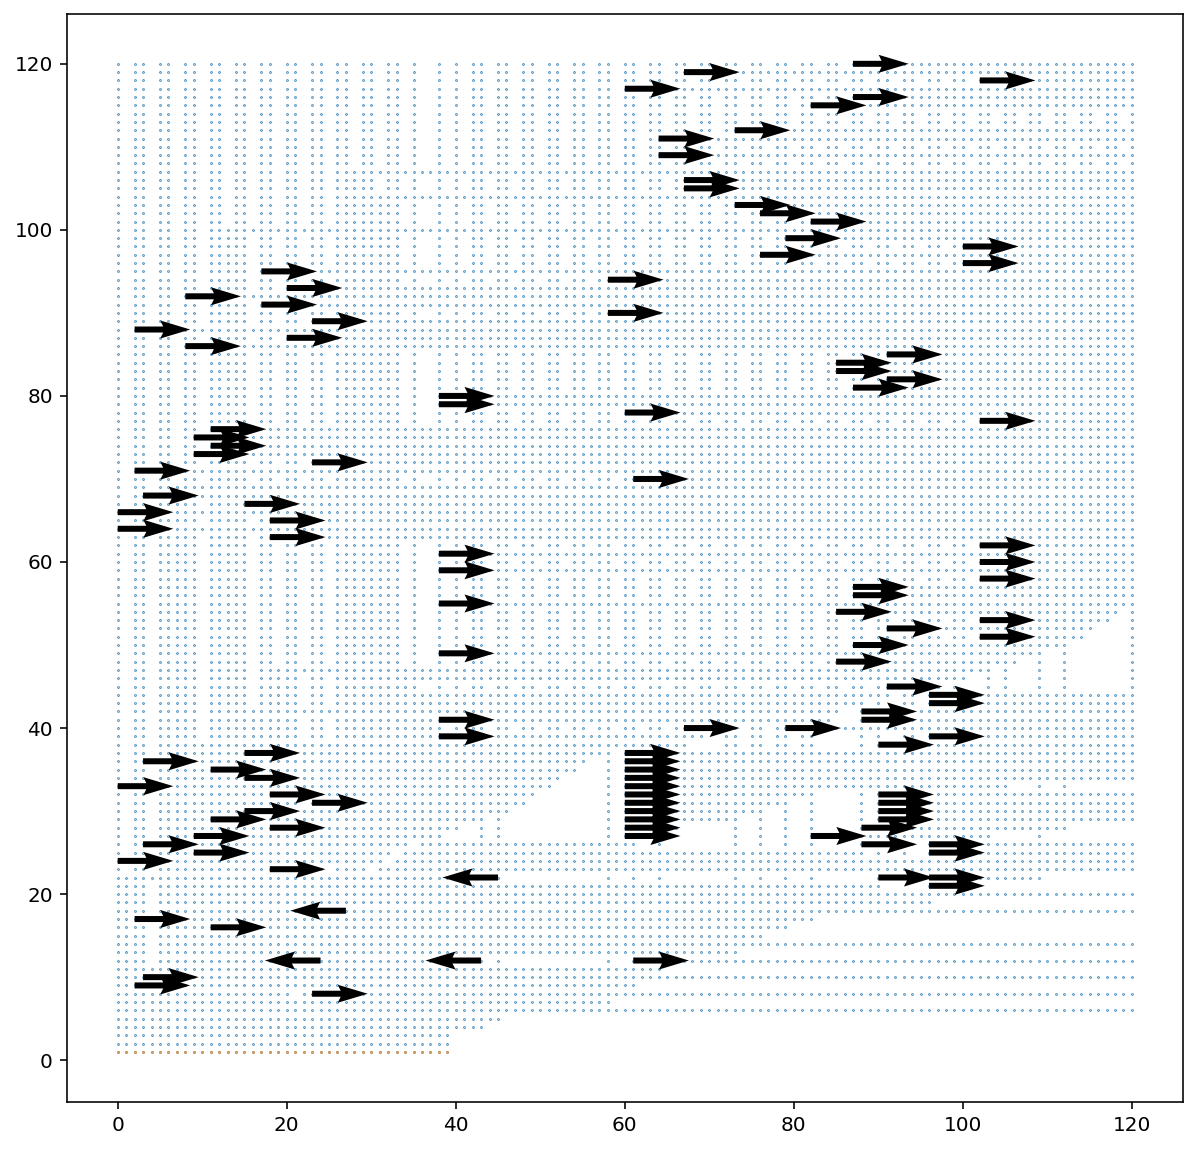

In [36]:
# 结论：tjunction 的 orient 指向是没有接头的那边
#               |
#  ------------  ----> orient
#               |
plt.figure(figsize=(10,10))
plt.scatter(vals[0],vals[1],s=0.1)
lever = local_display(df[df['obj'].str.match('mesecons_walllever:wall_lever_off')],1,1,120,120).T
plt.scatter(lever[0], lever[1],s=0.1)
tjunc = local_display(df[df['obj'].str.match('mesecons_extrawires:tjun')],1,1,120,120).T
plt.quiver(tjunc[0], tjunc[1],tjunc[2]-2,0*tjunc[2])
plt.savefig("dump.png")

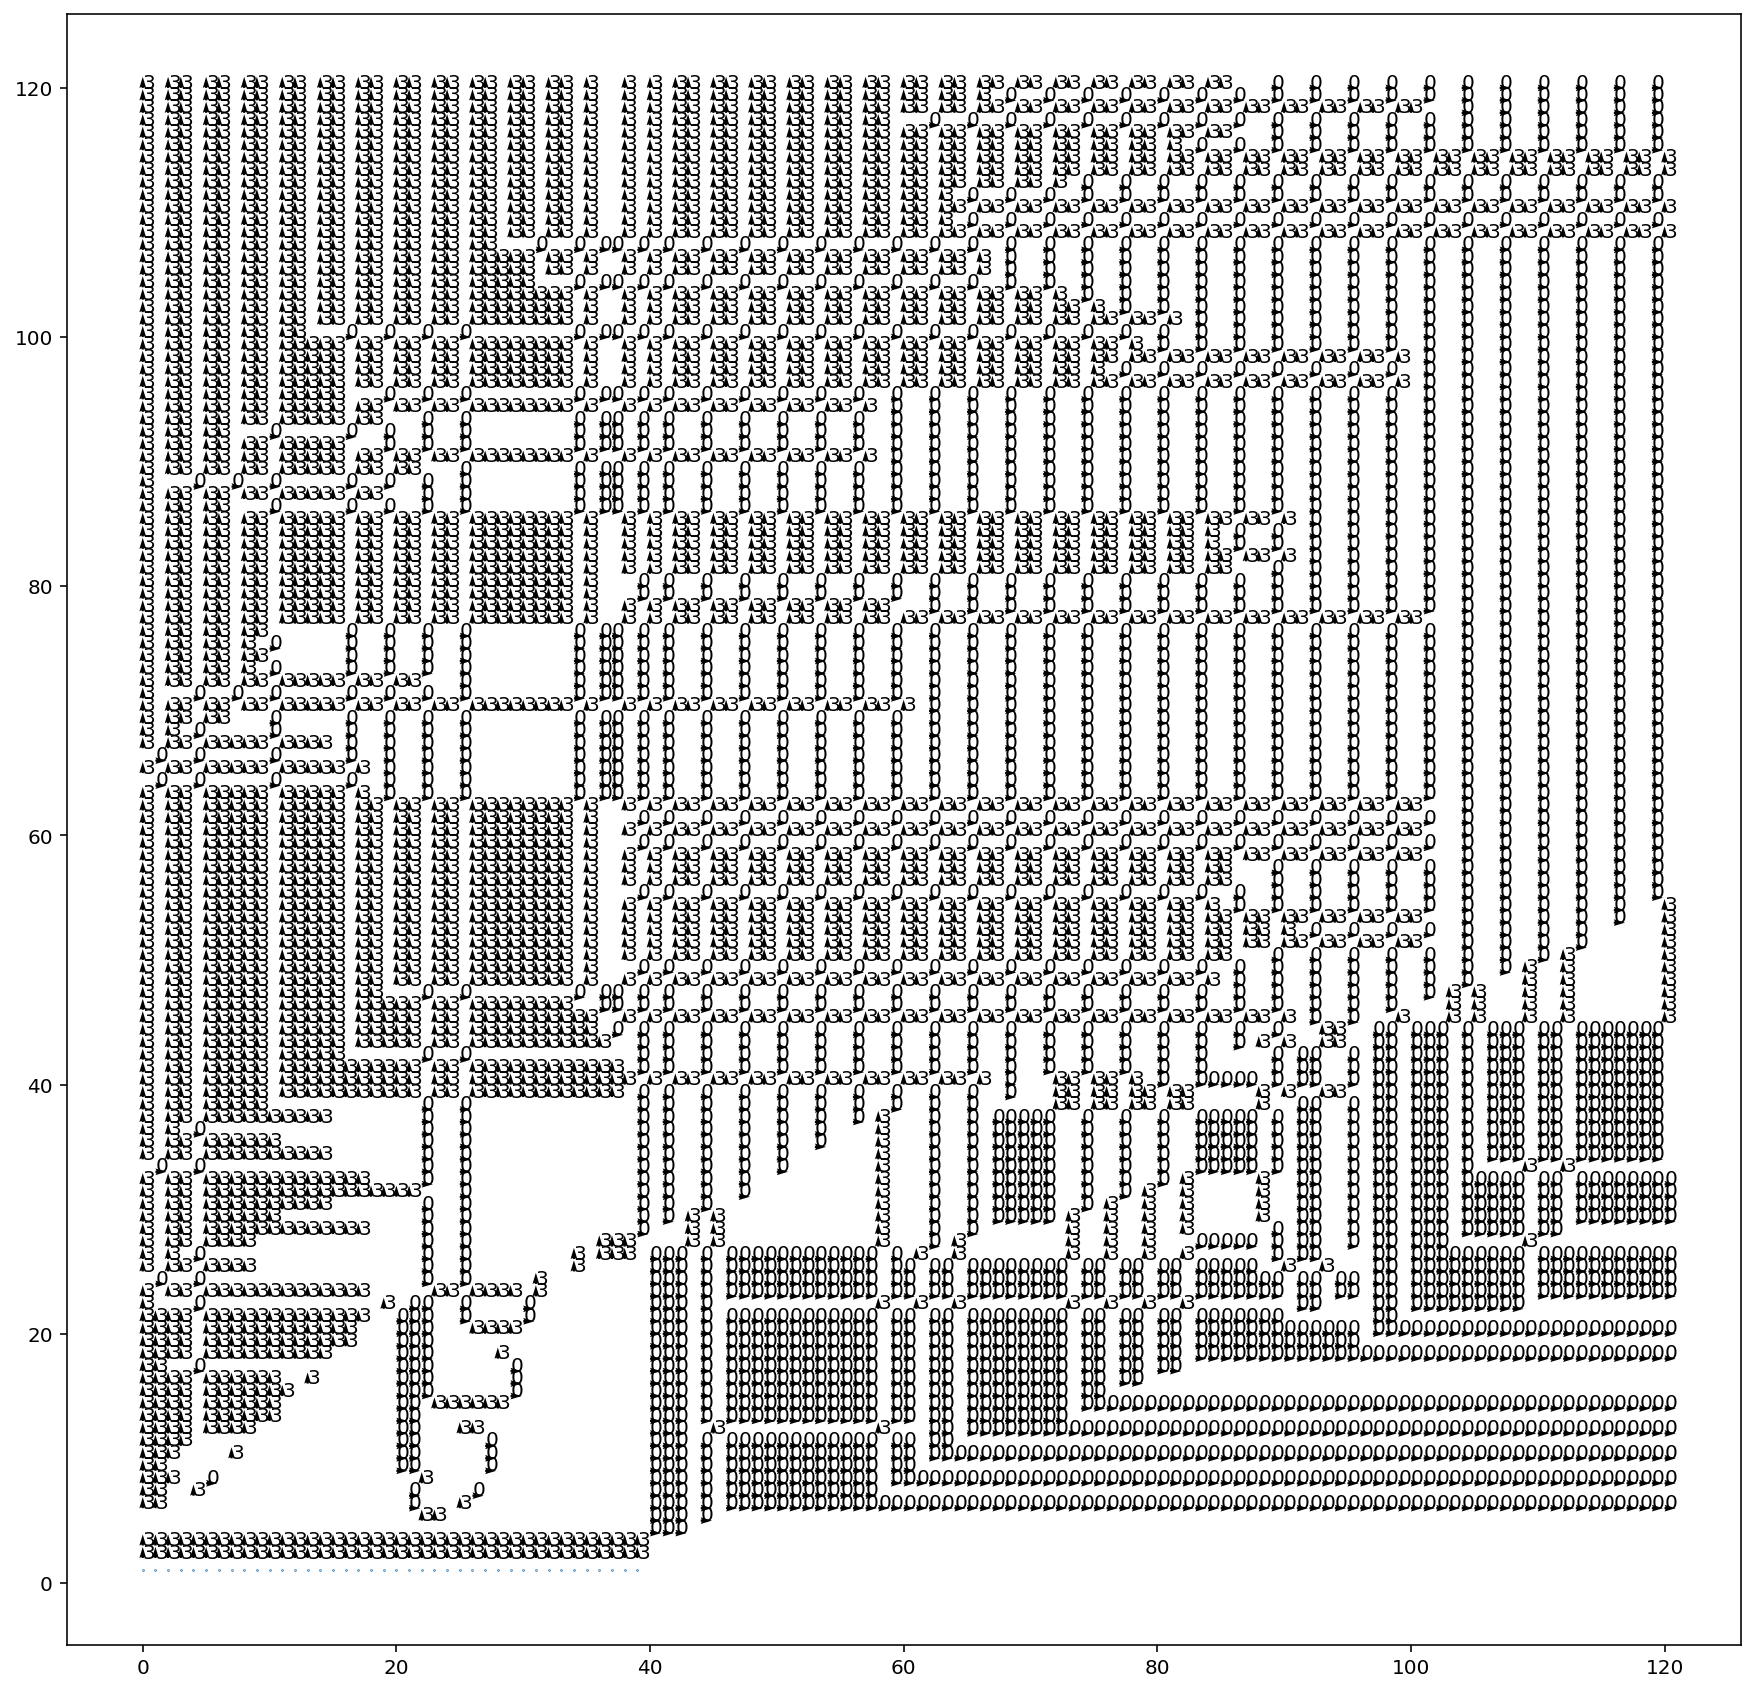

In [120]:
# 结论：tjunction 的 orient 指向是没有接头的那边
#               |
#  ------------  ----> orient
#               |
plt.figure(figsize=(15,15))
#plt.scatter(vals[0],vals[1],s=0.1)
lever = local_display(df[df['obj'].str.match('mesecons_walllever:wall_lever_off')],1,1,120,120).T
plt.scatter(lever[0], lever[1],s=0.1)
tjunc = local_display(df[df['obj'].str.match('mesecons_insulated:')],1,1,120,120).T
plt.quiver(tjunc[0], tjunc[1],np.cos(0.5*np.pi*tjunc[2]),-np.sin(0.5*np.pi*tjunc[2]))
for i in range(tjunc[0].size):
    plt.annotate(str(tjunc[2][i]), (tjunc[0][i], tjunc[1][i]))

plt.savefig("dump.png")

In [23]:
def getcell(d, x, y):
    cur = d[(d['x'] == x) & (d['y'] == y)]
    return cur

In [154]:
i = 0
def flood(d, x, y, var, lastx, lasty):
    if getcell(d, x, y).empty:
        return 0
    this = getcell(d, x, y).iloc[0]['obj']
    if getcell(d, x, y).iloc[0]['var'] != -1:
        if getcell(d, x, y).iloc[0]['var'] != var:
            raise Exception("Fuck! ERROR")
        return 0
    
    if this  in ['mesecons_lamp:lamp_off', 'mesecons_gates:not_on',
       'mesecons_gates:and_on', 'mesecons_gates:not_off',
       'mesecons_gates:or_on', 'mesecons_gates:and_off',
       'mesecons_gates:xor_off', 'mesecons_gates:or_off',
       'mesecons_gates:xor_on', 'mesecons_walllever:wall_lever_off']:
        return 0
    else:
        if this in ['mesecons_extrawires:crossover_on','mesecons_extrawires:crossover_off']:
            flood(d, x + (x - lastx) , y + (y - lasty), var, x, y)
            return 0
        
        df.loc[getcell(d, x, y).index,'var'] = var
        if this in ['mesecons_insulated:insulated_off', 'mesecons_insulated:insulated_on']:
            if getcell(d, x, y).iloc[0]['orient'] == 3:
                flood(d, x, y+1,var, x, y)
                flood(d, x, y-1, var, x, y)
            elif getcell(d, x, y).iloc[0]['orient'] ==0:
                flood(d, x-1, y, var, x, y)
                flood(d, x+1, y, var, x, y)
            else:
                raise Exception("Orient")
        elif this in ['mesecons_extrawires:tjunction_on','mesecons_extrawires:tjunction_off']:
            if getcell(d, x, y).iloc[0]['orient'] == 1:
                flood(d, x, y+1,var, x, y)
                flood(d, x, y-1, var, x, y)
                flood(d, x-1, y, var, x, y)
            elif getcell(d, x, y).iloc[0]['orient'] == 3:
                flood(d, x, y+1, var, x, y)
                flood(d, x, y-1, var, x, y)
                flood(d, x+1, y, var, x, y)
            else:
                raise Exception("Orient")
        elif this in ['mesecons_extrawires:corner_on','mesecons_extrawires:corner_off']:
            if getcell(d, x, y).iloc[0]['orient'] == 0:
                flood(d, x-1, y,var, x, y)
                flood(d, x, y-1, var, x, y)
            elif getcell(d, x, y).iloc[0]['orient'] == 1:
                flood(d, x, y+1, var, x, y)
                flood(d, x-1, y, var, x, y)
            elif getcell(d, x, y).iloc[0]['orient'] == 2:
                flood(d, x, y+1, var, x, y)
                flood(d, x+1, y, var, x, y)
            elif getcell(d, x, y).iloc[0]['orient'] == 3:
                flood(d, x, y-1, var, x, y)
                flood(d, x+1, y, var, x, y)
            else:
                raise Exception("Orient")
        else:
            print(this)
            raise Exception("What?")

In [156]:
flood(df, 1, 2, 0, 0, 2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/fan/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-7cf68c1f20d2>", line 1, in <module>
    flood(df, 1, 2, 0, 0, 2)
  File "<ipython-input-154-3baf52081a5a>", line 25, in flood
    flood(d, x, y+1,var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 25, in flood
    flood(d, x, y+1,var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 19, in flood
    flood(d, x + (x - lastx) , y + (y - lasty), var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 19, in flood
    flood(d, x + (x - lastx) , y + (y - lasty), var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 25, in flood
    flood(d, x, y+1,var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 25, in flood
    flood(d, x, y+1,var, x, y)
  File "<ipython-input-154-3baf52081a5a>", line 25, in flood
    flood(d, x, y+1,var, x, y)
  [Previ

KeyboardInterrupt: 

In [140]:
df.loc[getcell(df, 0,2).index,'var'] = -1

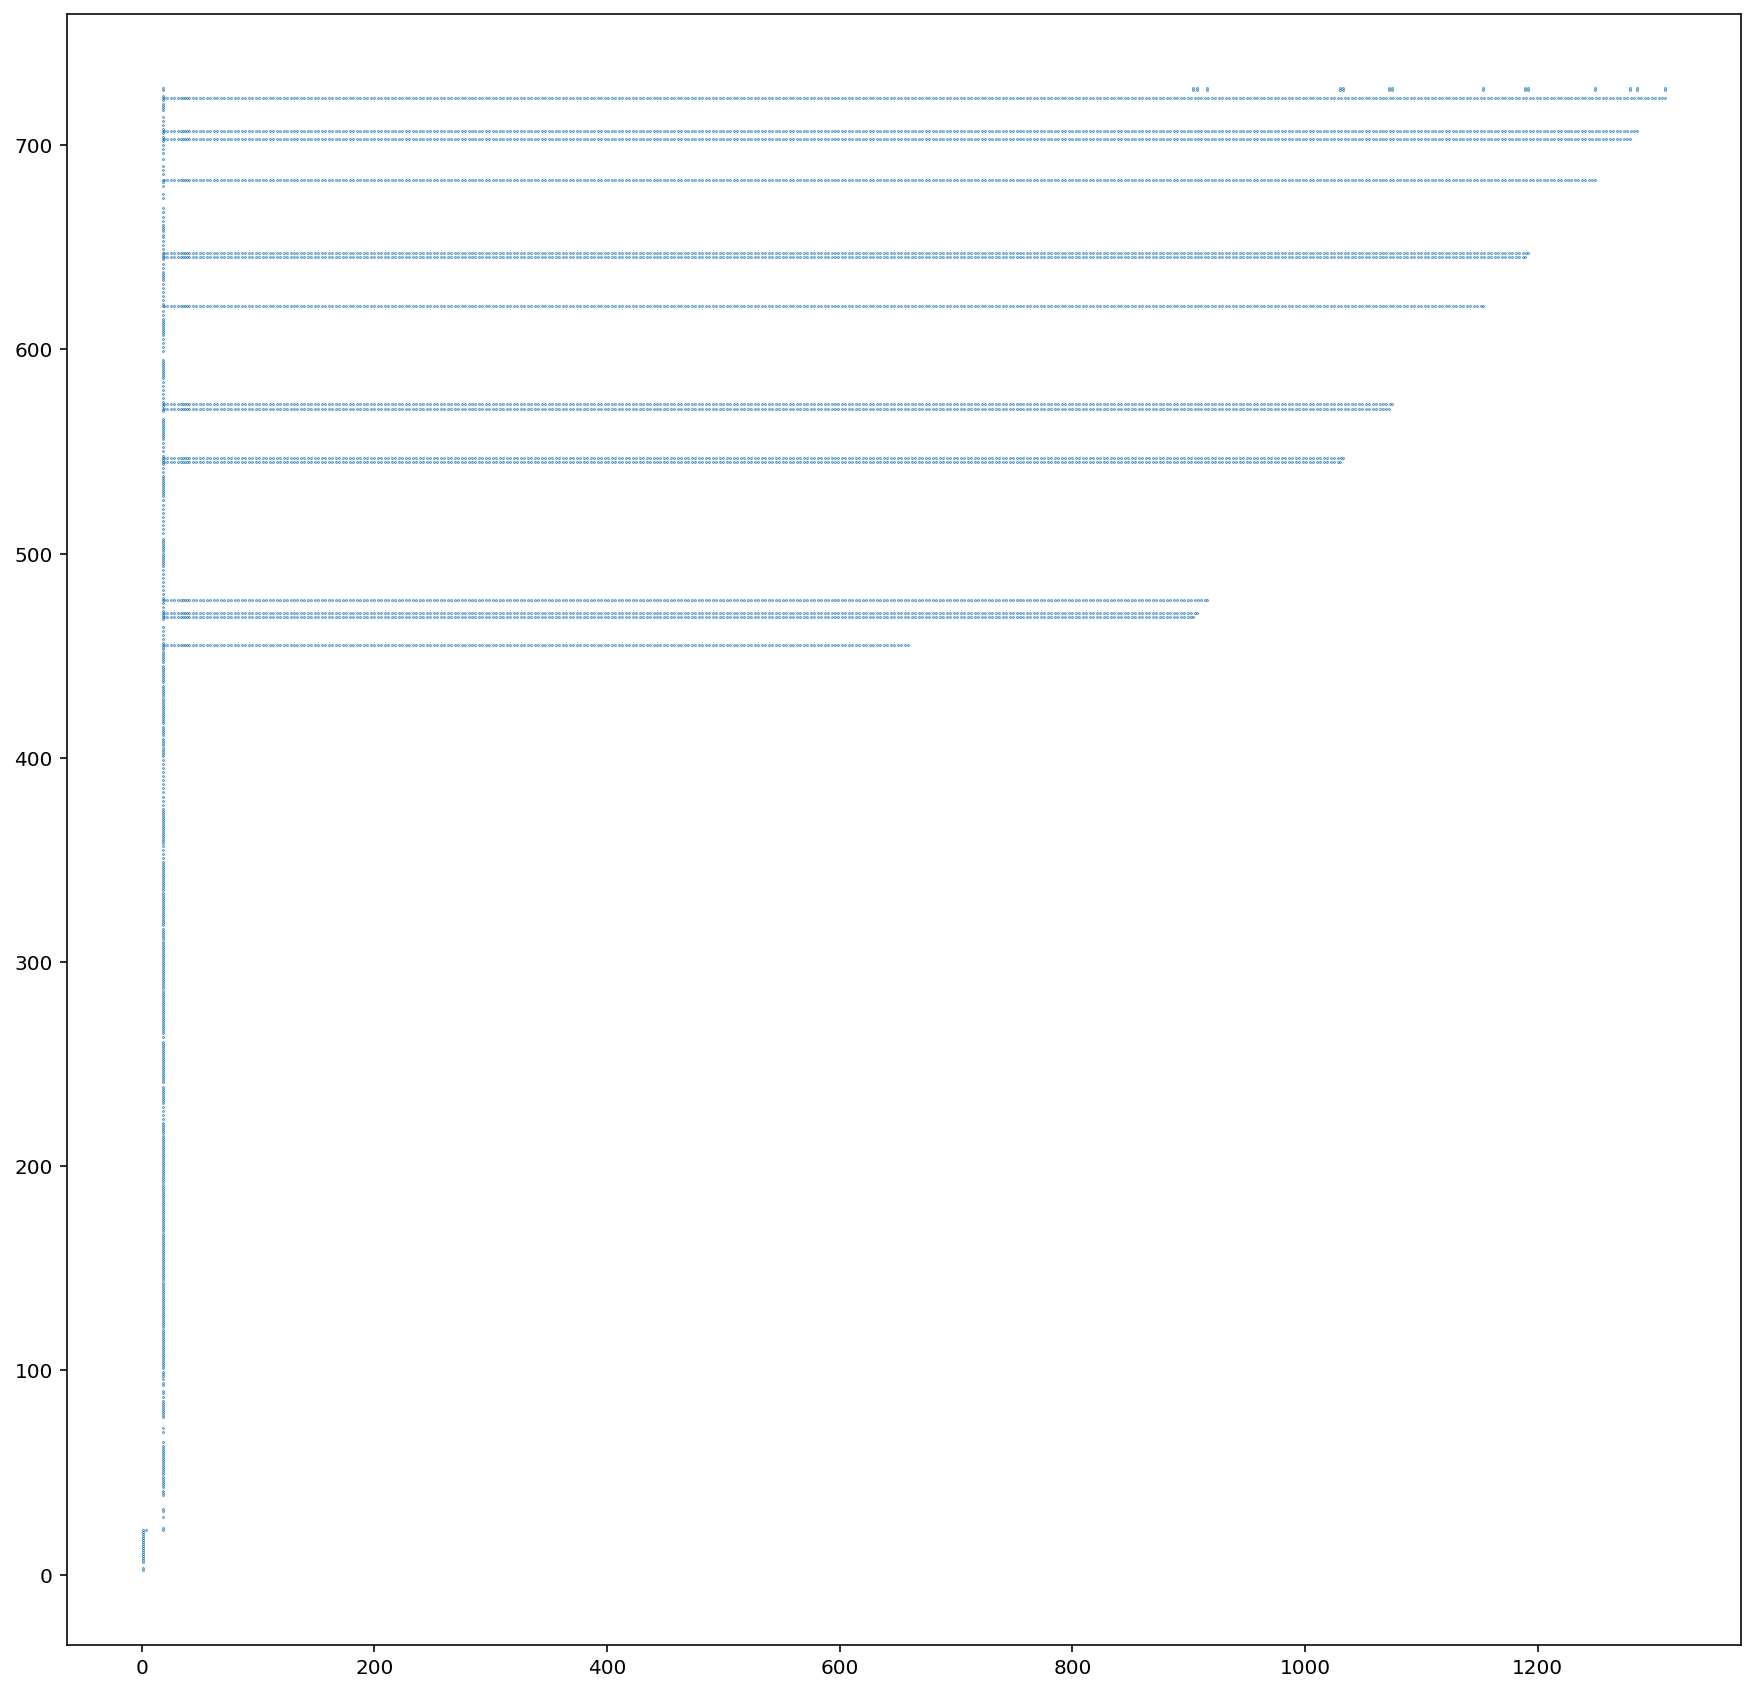

In [160]:
track = np.array(df[df['var'] == 0][['x','y','orient']].values).T
plt.figure(figsize=(15,15))
plt.scatter(track[0], track[1],s=0.1)

In [40]:
df[df['obj'].str.match('mesecons_extrawires:corner')]['orient'].unique()

array([1, 3, 0, 2])

In [155]:
df.loc[df['var'] == 0,'var']=-1